# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [49]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


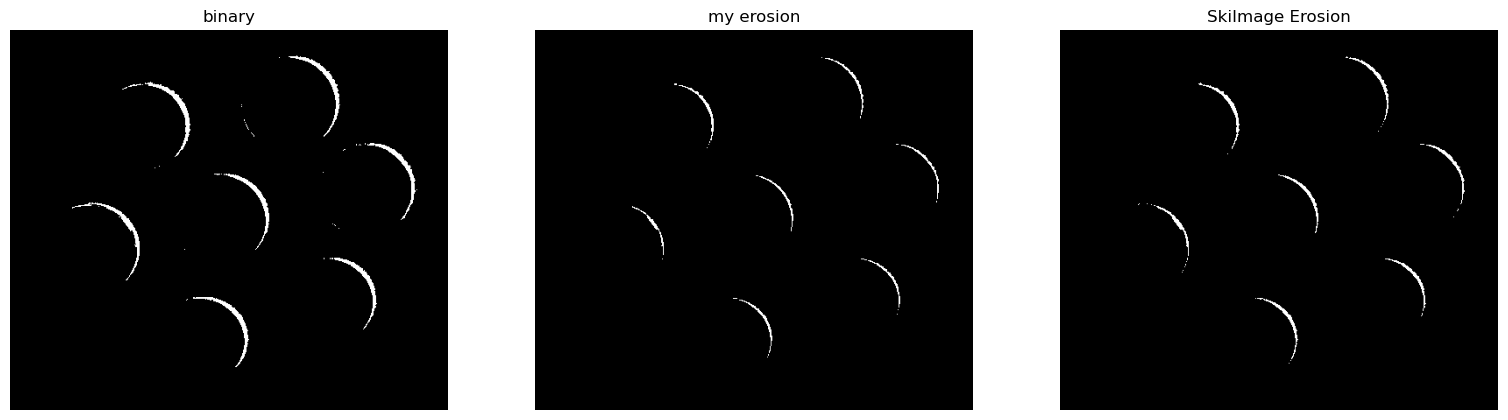

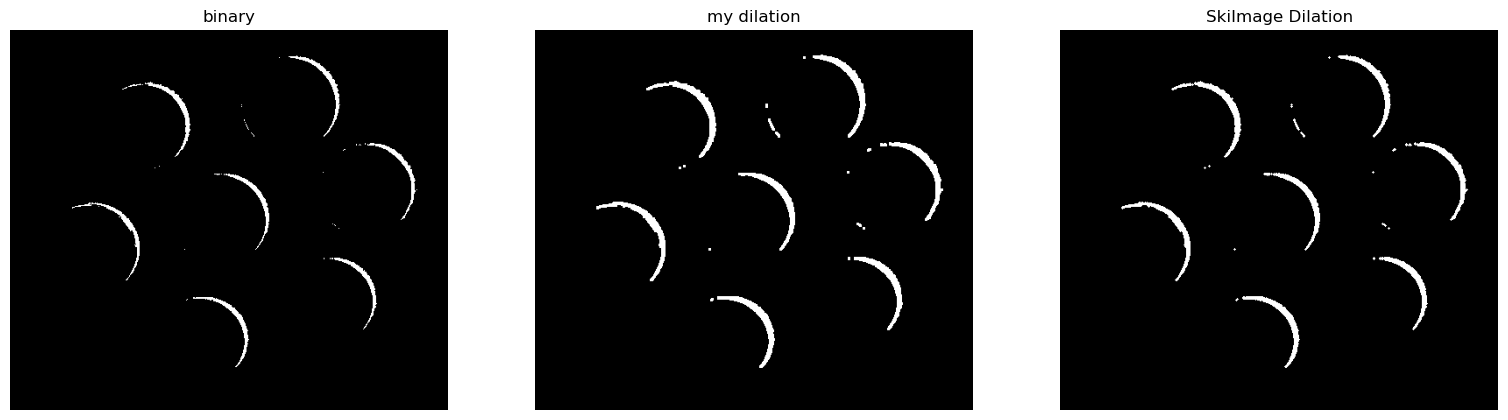

In [50]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

orig_img = io.imread('img/coins.jpg')
img_grey = rgb2gray(orig_img)
# print (img_grey)
thresh = 0.3
img = np.zeros(img_grey.shape)
img[img_grey < thresh] = 1   # Binary Image

print (img)


# show_images([orig_img, img], ['Original','Binary Image'])
# print (img.shape)

struct_elem = np.ones((3,3))


def erosion(img, window_size):
    new_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i < window_size//2 or j < window_size//2 or i >= img.shape[0] - window_size//2 or j >= img.shape[1] - window_size//2:
                new_img[i][j] = 0
            else:
                new_img[i][j] = np.min(img[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1])
    return new_img


def dilation(img , window_size):
    new_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i < window_size//2 or j < window_size//2 or i >= img.shape[0] - window_size//2 or j >= img.shape[1] - window_size//2:
                new_img[i][j] = 0
            else:
                new_img[i][j] = np.max(img[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1])
    return new_img

erosion_img = erosion(img, 3)
dilation_img = dilation(img, 3)

show_images([img, erosion_img ,  binary_erosion(img)], ['binary', 'my erosion' ,'SkiImage Erosion'])
show_images([img, dilation_img ,  binary_dilation(img)], ['binary', 'my dilation' ,'SkiImage Dilation'])




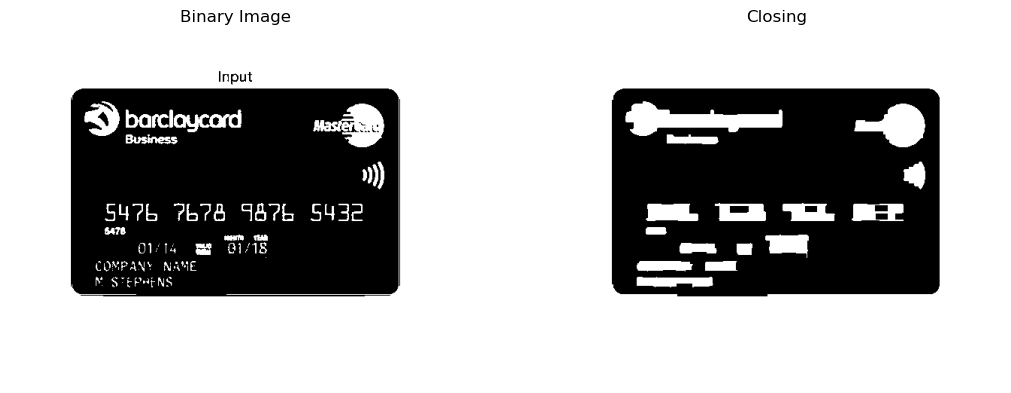

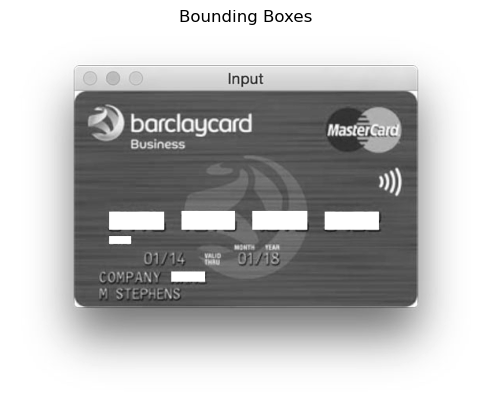

In [80]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
img = io.imread('img/card.jpg')
img_gray = rgb2gray(img)
thresh = 0.55
img_binary = np.zeros(img_gray.shape)
img_binary[img_gray > thresh] = 1

# show_images([img, img_gray , img_binary], ['Original', ' gray','Binary Image'])
struct_elem = np.ones((8,16))

# Closing
img_closing = binary_closing(img_binary, footprint=struct_elem)
show_images([img_binary, img_closing], ['Binary Image', 'Closing'])

cnts = find_contours(img_closing, 0.8)

bounding_boxes = list()
for cnt in cnts:
    min_x = min(cnt[:,1])
    max_x = max(cnt[:,1])
    min_y = min(cnt[:,0])
    max_y = max(cnt[:,0])
    if (max_x - min_x)/(max_y-min_y) > 2.5 and (max_x - min_x)/(max_y-min_y) < 3.5:
        bounding_boxes.append([min_x, max_x, min_y, max_y])


#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    img_gray[rr, cc] = 1 #set color white

show_images([img_gray], ['Bounding Boxes'])

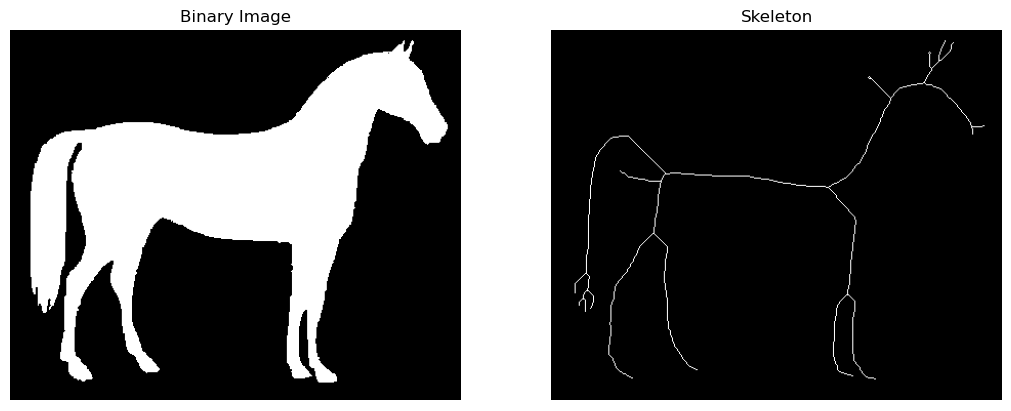

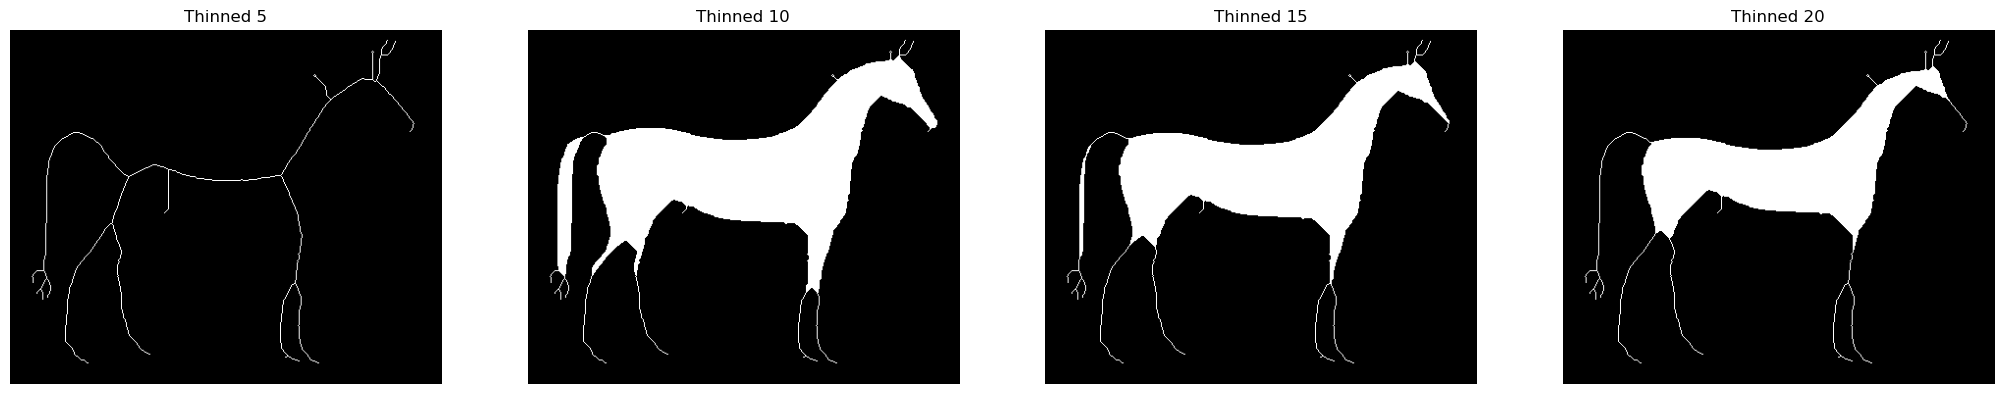

In [81]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = io.imread('img/horse.jpg')
img_gray = rgb2gray(img)
thresh = 0.9
img_binary = np.zeros(img_gray.shape)
img_binary[img_gray > thresh] = 1

# show_images([img, img_gray , img_binary], ['Original', ' gray','Binary Image'])

skeleton = skeletonize(img_binary)

show_images([img_binary, skeleton], ['Binary Image', 'Skeleton'])

thinned_5 = thin(img_binary, max_num_iter=5)
thinned_10 = thin(img_binary, max_num_iter=10)
thinned_15 = thin(img_binary, max_num_iter=15)
thinned_20 = thin(img_binary, max_num_iter=20)

show_images([thinned_5, thinned_10, thinned_15, thinned_20], ['Thinned 5', 'Thinned 10', 'Thinned 15', 'Thinned 20'])